# Projeto 03
## Transfer Learning
### Grupo: 8
### Alunos:

-  SHERLON ALMEIDA DA SILVA	
-  GUILHERME MONTRONI
-  MARCUS VINICIUS LOBO COSTA
---

## Download do dataset catas and dogs
No dataset contém o conjunto de treinamento e validação, além das imagens externas para teste com a nossa topologia de rede

In [1]:
import gdown #Importando biblioteca para donwload de arquivos do Google Drive

#Link compartilhável
#https://drive.google.com/file/d/1Iy15ZoxhPCYbZ16Q5jJNVlbM4RGrW1np/view?usp=sharing 

#Realizando download

!gdown --id '1Iy15ZoxhPCYbZ16Q5jJNVlbM4RGrW1np' #id do link de compartilhamento

Downloading...
From: https://drive.google.com/uc?id=1Iy15ZoxhPCYbZ16Q5jJNVlbM4RGrW1np
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 89.5MB/s]


In [2]:
#Descompactando dataset para a raiz do notebook
!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

## Carregando dataset

In [3]:
import tensorflow as tf #Utilizado para criação da topologia da rede
from keras.preprocessing.image import ImageDataGenerator #Utilizado para leitura das imagens

# --- Definindo alguns parâmetros definidos no enunciado do projeto ---
batch_size = 32
image_size = (160, 160)
# ---

#Normalização para as imagens de treinamento
train_datagen = ImageDataGenerator(rescale = 1./255)

#Normalização para as imagens de teste
test_datagen = ImageDataGenerator(rescale = 1./255)

#Lendo as imagens de treinamento e aplicando a normalização
training_set = train_datagen.flow_from_directory(directory = '/content/cats_and_dogs_filtered/train', #Caminho do diretório de treinamento 
                                                target_size = image_size,
                                                batch_size = batch_size,
                                                class_mode='categorical')

#Lendo as imagens de teste e aplicando a normalização
test_set = test_datagen.flow_from_directory(directory = '/content/cats_and_dogs_filtered/validation', #Caminho do diretório de teste
                                            target_size = image_size,
                                            batch_size = 1,
                                            class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
#Visualizando todas as instâncias para o conjunto de treinamento
training_set.n

2000

In [5]:
# Passo do treinamento
step_size_train = training_set.n // training_set.batch_size
step_size_train

62

In [6]:
#Passo do teste
step_size_test = test_set.n // test_set.batch_size
step_size_test

1000

##Visualizando uma amostra dos dados

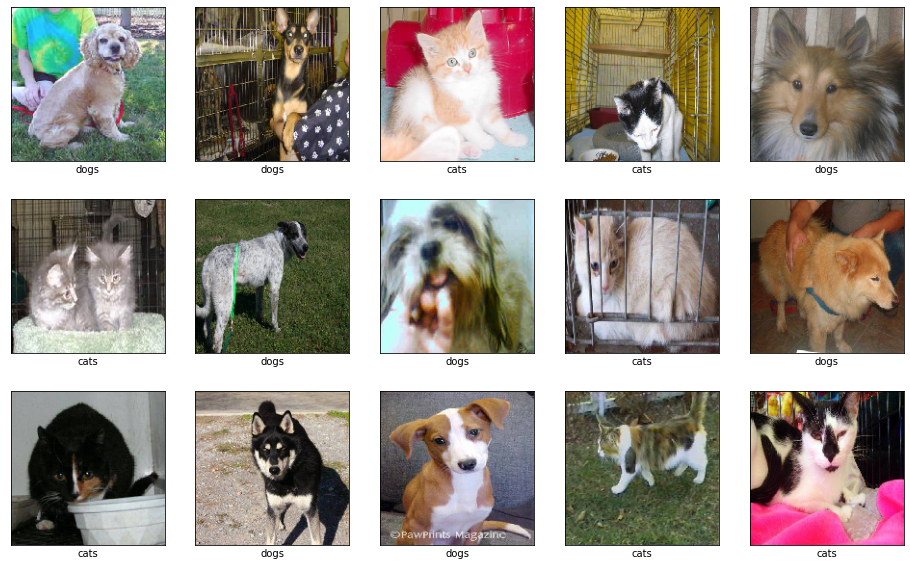

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#Visualizando as imagens do dataset
classes = [c for c in test_set.class_indices]

row = 3; col = 5;

plt.figure(figsize = (16,10))
for i in range(row*col): #test_set.n):
    img, label = test_set.next()
    img = np.squeeze(img)
    plt.subplot(row, col, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(classes[np.argmax(label)])

plt.show()

# Aplicando Transfer Learning


## Testando base de dados com a rede MobileNetV2

In [8]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(160, 160, 3), include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [9]:
#Printando as camadas da rede MobileNetV2
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

In [10]:
#Como apresentado acima, a rede pré-treinada com os pesos da Imagenet acaba na iteração (camada) 153,
#Agora iremos congelar todas as camadas pré-treinadas com os pesos da Imagenet
for layer in base_model.layers[:154]:
  layer.trainable = False

In [11]:
#Visualizando arquitetura da rede
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [12]:
#Realizando a construção final do modelo

x = base_model.output # passando o modelo pré-treinado para a variável x

#A seguir são adições feitas de acordo com enunciado do projeto
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(2048, activation='relu')(x)

num_classes = len(test_set.class_indices) 
preds = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs = base_model.input, outputs = preds)

In [13]:
#Printando as camadas da rede MobileNetV2
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

In [14]:
#Descongelando a parte personalizada, criada acima com as camadas densas
for layer in model.layers[154:]:
  layer.trainable = True

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [16]:
#Compilando o modelo
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#Treinando a rede com os parâmetros

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#adicionandos callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta = 1e-5, patience = 3, verbose=1)
early = EarlyStopping(monitor='val_accuracy', patience = 6, mode='max')

callbacks = [early, lr_reduce]

epochs = 100
history = model.fit(training_set,
                    epochs = epochs,
                    steps_per_epoch = step_size_train,
                    validation_data = test_set,
                    validation_steps = step_size_test,
                    callbacks = [callbacks]
                    )

Epoch 1/100
62/62 [==============================] - 32s 346ms/step - loss: 0.2453 - accuracy: 0.9451 - val_loss: 0.1665 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 2/100
62/62 [==============================] - 20s 321ms/step - loss: 0.0437 - accuracy: 0.9827 - val_loss: 0.1207 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 3/100
62/62 [==============================] - 20s 334ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.1238 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 4/100
62/62 [==============================] - 20s 333ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.1425 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 5/100
62/62 [==============================] - 20s 330ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1442 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 6/100
62/62 [==============================] - 21s 334ms/step - loss: 6.6119e-04 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 7/100
62/62 [==============================] - 2

## Avaliação da rede

In [18]:
#Acurácia treinamento 
import numpy as np 
np.mean(history.history['val_accuracy'])

0.9668181863698092

In [19]:
#Desvio padrão treinamento
np.std(history.history['val_accuracy'])

0.004895613083928767

Curvas de aprendizagem

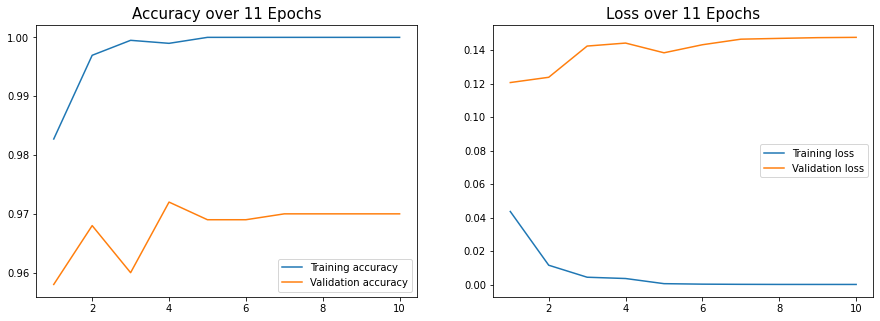

In [20]:
#Visualizando os gráficos de convergência da rede
import matplotlib.pyplot as plt
%matplotlib inline

epochs = len(history.history['val_accuracy']) #Pegando a quantidade de vezes que foi treinado com o early stoping

def plot_acc_loss(history, epochs):

 acc = history.history['accuracy']
 loss = history.history['loss']
 val_acc = history.history['val_accuracy']
 val_loss = history.history['val_loss']
 plt.figure(figsize=(15, 5))

 #Convergência do treinamento 
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Training accuracy')
 plt.plot(range(1,epochs), val_acc[1:], label='Validation accuracy')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 #---

 #Convergência do teste 
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Training loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Validation loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend();
 plt.show()
 #---

plot_acc_loss(history, epochs)

Previsões

In [21]:
#Pega todas as imagens do teste
filenames = test_set.filenames
filenames

['cats/cat.2000.jpg',
 'cats/cat.2001.jpg',
 'cats/cat.2002.jpg',
 'cats/cat.2003.jpg',
 'cats/cat.2004.jpg',
 'cats/cat.2005.jpg',
 'cats/cat.2006.jpg',
 'cats/cat.2007.jpg',
 'cats/cat.2008.jpg',
 'cats/cat.2009.jpg',
 'cats/cat.2010.jpg',
 'cats/cat.2011.jpg',
 'cats/cat.2012.jpg',
 'cats/cat.2013.jpg',
 'cats/cat.2014.jpg',
 'cats/cat.2015.jpg',
 'cats/cat.2016.jpg',
 'cats/cat.2017.jpg',
 'cats/cat.2018.jpg',
 'cats/cat.2019.jpg',
 'cats/cat.2020.jpg',
 'cats/cat.2021.jpg',
 'cats/cat.2022.jpg',
 'cats/cat.2023.jpg',
 'cats/cat.2024.jpg',
 'cats/cat.2025.jpg',
 'cats/cat.2026.jpg',
 'cats/cat.2027.jpg',
 'cats/cat.2028.jpg',
 'cats/cat.2029.jpg',
 'cats/cat.2030.jpg',
 'cats/cat.2031.jpg',
 'cats/cat.2032.jpg',
 'cats/cat.2033.jpg',
 'cats/cat.2034.jpg',
 'cats/cat.2035.jpg',
 'cats/cat.2036.jpg',
 'cats/cat.2037.jpg',
 'cats/cat.2038.jpg',
 'cats/cat.2039.jpg',
 'cats/cat.2040.jpg',
 'cats/cat.2041.jpg',
 'cats/cat.2042.jpg',
 'cats/cat.2043.jpg',
 'cats/cat.2044.jpg',
 'cats/cat

In [22]:
predictions = model.predict(test_set, steps = len(filenames))

In [23]:
#Retorna as probabilidades
predictions

array([[1.0000000e+00, 4.1631680e-09],
       [3.3264950e-08, 1.0000000e+00],
       [1.0000000e+00, 3.4850300e-10],
       ...,
       [9.9999988e-01, 1.3098753e-07],
       [1.0000000e+00, 1.0740711e-09],
       [1.0000000e+00, 2.4863775e-09]], dtype=float32)

In [24]:
predictions2 = []
for i in range(len(predictions)):
  predictions2.append(np.argmax(predictions[i]))

In [25]:
predictions2

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [26]:
#Fazendo previsão com as imagens reais
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

Matriz de confusão

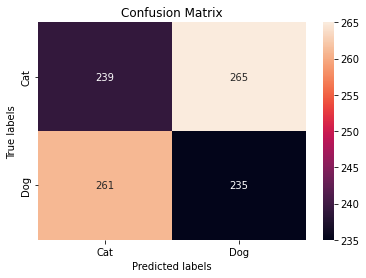

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(predictions2, test_set.classes)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['Cat', 'Dog']); 
ax.yaxis.set_ticklabels(['Cat', 'Dog']);
plt.savefig('cm.png', dpi=500)

In [29]:
#Acurária em relação ao conjunto teste
accuracy_score(predictions2, test_set.classes)

0.474